In [36]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import importlib

import NN_helpers

importlib.reload(NN_helpers)

from matplotlib import rcParams

In [2]:
diab=pd.read_csv('datasets/diabetes.csv')

train,test=train_test_split(diab,test_size=0.1,random_state=0,stratify=diab['Outcome'])

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Outcome']
y_test=test['Outcome']

In [3]:
n_iters = 10000
classifier = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', n_iter_no_change=n_iters, max_iter=n_iters)

In [4]:
classifier.fit(X_train, y_train)

/home/maaslak/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10000, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
y_predicted = classifier.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[46,  4],
       [10, 17]])

layer weight matrix shapes: [(8, 4), (4, 1)]
detected layer sizes: [8, 4, 1]


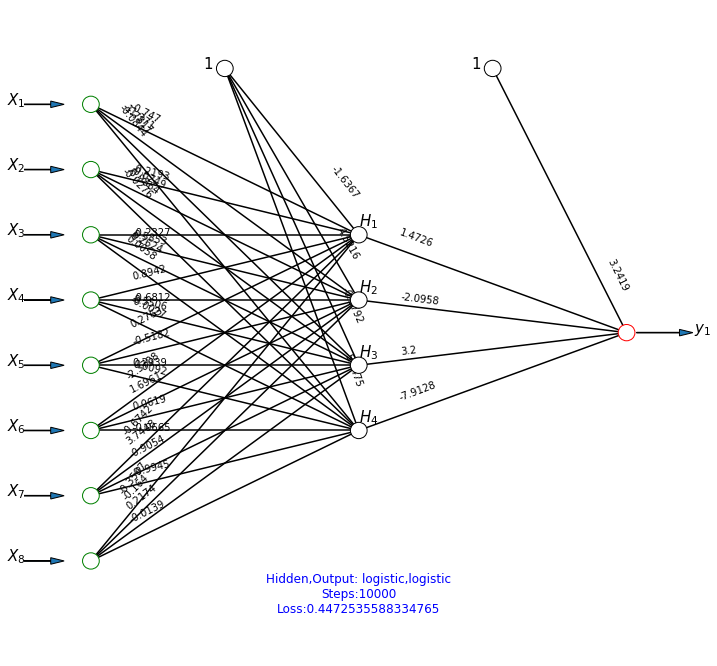

In [6]:
# NN_helpers.draw_response(classifier, X_test, Y_test)
NN_helpers.draw_nn(classifier)

/home/maaslak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/maaslak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


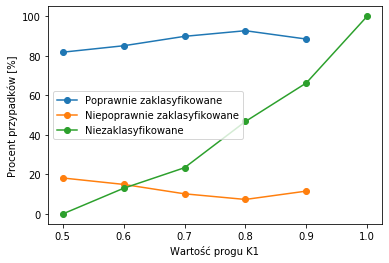

In [6]:
outputs = classifier.predict_proba(X_test)[:, 0]
K1 = [0.50001, 0.6, 0.7, 0.8, 0.9, 1.0]
K0 = [0.49999, 0.4, 0.3, 0.2, 0.1, 0.0]

true = []
false = []
not_clasified = []

for k1, k0 in zip(K1, K0):
    pred_k1 = outputs > k1
    pred_k0 = outputs < k0
    TP = np.sum(np.bitwise_and(pred_k1, 1 - y_test))
    TN = np.sum(np.bitwise_and(pred_k0, y_test))
    FP = np.sum(np.bitwise_and(pred_k1, y_test))
    FN = np.sum(np.bitwise_and(pred_k0, 1 - y_test))
    true.append(100 * (TP + TN) / sum([TP, TN, FP, FN]))
    false.append(100 * (FP + FN) / sum([TP, TN, FP, FN]))
    not_clasified.append(100 * (len(outputs) - sum([TP, TN, FP, FN])) / len(outputs))

plt.plot(K1, true, 'o-', label="Poprawnie zaklasyfikowane")
plt.plot(K1, false, 'o-', label="Niepoprawnie zaklasyfikowane")
plt.plot(K1, not_clasified, 'o-', label="Niezaklasyfikowane")
plt.xlabel("Wartość progu K1")
plt.ylabel("Procent przypadków [%]")
plt.legend()
# plt.savefig("figures/uncertain_responses.pdf")
plt.show()

In [7]:
ds = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(ds['data'], ds['target'], test_size=0.1, random_state=42)


In [24]:
n_iters = 5000
classifier = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', n_iter_no_change=n_iters, max_iter=n_iters)
classifier.fit(X_train, y_train)
print("Accuracy: {}".format(classifier.score(X_test, y_test)))

Accuracy: 1.0


/home/maaslak/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


layer weight matrix shapes: [(4, 3), (3, 3)]
detected layer sizes: [4, 3, 3]


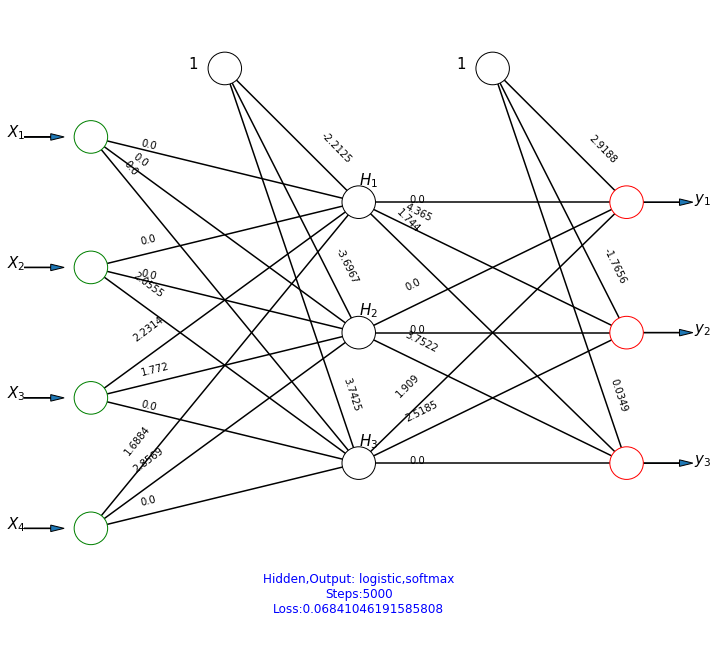

In [35]:
NN_helpers.draw_nn(classifier)

In [26]:
def damage_NN(mlp):
    neuron_idx = (0, 0)
    min_val = mlp.coefs_[0][0][0]
    for i, layer in enumerate(mlp.coefs_):
        val = np.min(layer[np.nonzero(layer)])
        if val < min_val:
            neuron_idx = (i, np.where(layer == val))
            min_val = val            
    mlp.coefs_[neuron_idx[0]][neuron_idx[1]] = 0    

train_acc = []
test_acc=[]
test_acc.append(classifier.score(X_test, y_test))
train_acc.append(classifier.score(X_train, y_train))

for _ in range(10):
    damage_NN(classifier)
    test_acc.append(classifier.score(X_test, y_test))
    train_acc.append(classifier.score(X_train, y_train))


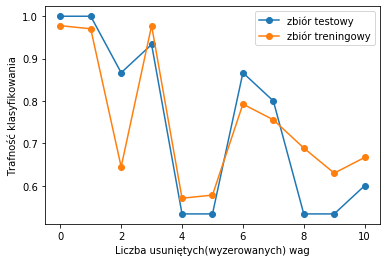

In [29]:
# 27 parametrów

plt.plot(test_acc, 'o-', label="zbiór testowy")
plt.plot(train_acc, 'o-',label="zbiór treningowy")
plt.xlabel("Liczba usuniętych(wyzerowanych) wag")
plt.ylabel("Trafność klasyfikowania")
plt.legend()
#plt.savefig("figures/damaged_nn.pdf")
plt.show()

layer weight matrix shapes: [(4, 3), (3, 3)]
detected layer sizes: [4, 3, 3]


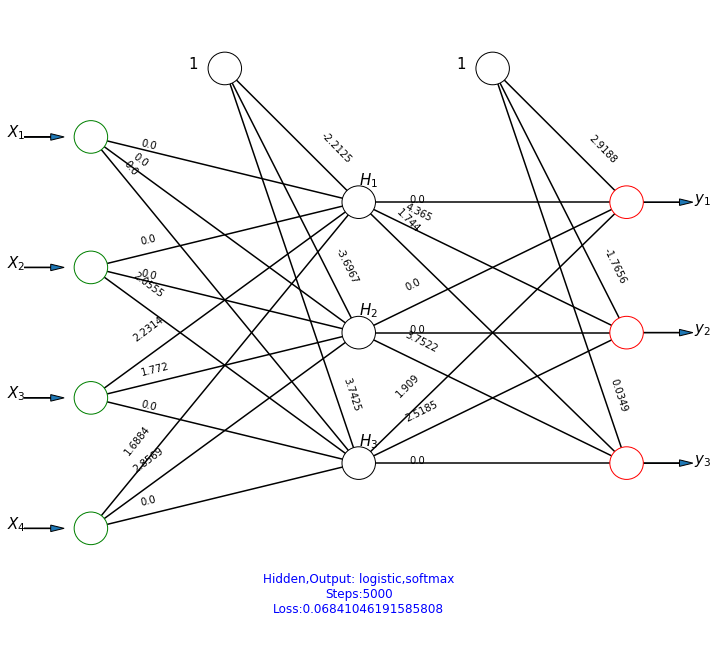

In [33]:
NN_helpers.draw_nn(classifier)

# Zad 9 
### BUPA

In [79]:
bupa_ds=pd.read_csv('datasets/bupa.data', header=None)
X_bupa_ds = bupa_ds[bupa_ds.columns[:6]]
y_bupa=bupa_ds[6]
X_train, X_test, y_train, y_test=train_test_split(X_bupa_ds, y_bupa, test_size=0.1)


In [80]:
X_train.shape

(310, 6)

In [82]:
bupa_accs = []
bupa_losses = []
validation_fractions = np.linspace(0.1, 0.9, 9)

for validation_fraction in validation_fractions:
    print("validation_fraction: {}".format(validation_fraction))
    classifier = MLPClassifier(hidden_layer_sizes=(20), solver='sgd',
                               activation='logistic',
                               n_iter_no_change=3000,
                               max_iter=15000, validation_fraction=validation_fraction,
                              early_stopping=True,
                              alpha=0)
    classifier.fit(X_train, y_train)
    
    
    train_acc = classifier.score(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    bupa_accs.append(acc)
    bupa_losses.append(classifier.loss_)
    
    print("train_acc: {} acc: {} loss: {}".format(train_acc, acc, classifier.loss_))
        

validation_fraction: 0.1
train_acc: 0.7032258064516129 acc: 0.6857142857142857 loss: 0.4947504093501778
validation_fraction: 0.2
train_acc: 0.7290322580645161 acc: 0.7714285714285715 loss: 0.49502418298775835
validation_fraction: 0.30000000000000004
train_acc: 0.7193548387096774 acc: 0.7428571428571429 loss: 0.45296810774136176
validation_fraction: 0.4
train_acc: 0.7322580645161291 acc: 0.8285714285714286 loss: 0.45351910438797627
validation_fraction: 0.5
train_acc: 0.7516129032258064 acc: 0.7428571428571429 loss: 0.5016389011165207
validation_fraction: 0.6
train_acc: 0.6967741935483871 acc: 0.7714285714285715 loss: 0.5111992922558566
validation_fraction: 0.7000000000000001
train_acc: 0.7 acc: 0.7142857142857143 loss: 0.41073744621024405
validation_fraction: 0.8
train_acc: 0.603225806451613 acc: 0.42857142857142855 loss: 0.5255797870277865
validation_fraction: 0.9
train_acc: 0.7258064516129032 acc: 0.6571428571428571 loss: 0.19411643661718367


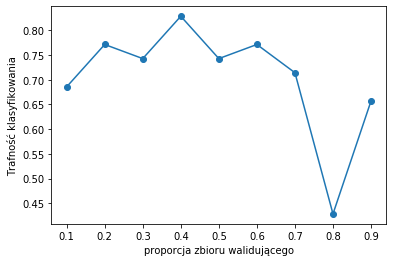

In [94]:
plt.plot(validation_fractions, bupa_accs, 'o-')
plt.xlabel("proporcja zbioru walidującego")
plt.ylabel("Trafność klasyfikowania")
# plt.savefig("figures/validation_accuracy.pdf")
plt.show()

[0.6857142857142857, 0.7714285714285715, 0.7428571428571429, 0.8285714285714286, 0.7428571428571429, 0.7714285714285715, 0.7142857142857143, 0.42857142857142855, 0.6571428571428571]


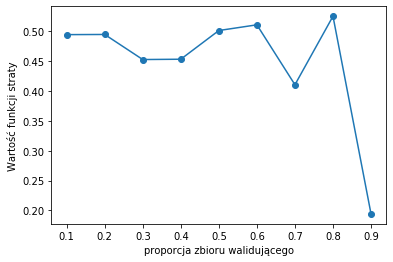

In [100]:
print(bupa_accs)
plt.plot(validation_fractions, bupa_losses, 'o-')
plt.xlabel("proporcja zbioru walidującego")
plt.ylabel("Wartość funkcji straty")
# plt.savefig("figures/validation_loss.pdf")
plt.show()

## Iris

In [16]:
iris_ds = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_ds['data'], iris_ds['target'], test_size=0.1)


In [17]:
iris_accs = []
iris_losses = []

for validation_fraction in validation_fractions:
    print("validation_fraction: {}".format(validation_fraction))
    classifier = MLPClassifier(hidden_layer_sizes=(40, 20), solver='adam',
                               activation='logistic',tol=1e-6,  n_iter_no_change=500, 
                               max_iter=15000, validation_fraction=validation_fraction,
                              early_stopping=True)
    classifier.fit(X_train, y_train)
    
    
    train_acc = classifier.score(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    iris_accs.append(acc)
    iris_losses.append(classifier.loss_)
    
    print("train_acc: {} acc: {} loss: {}".format(train_acc, acc, classifier.loss_))


validation_fraction: 0.1
train_acc: 0.9407407407407408 acc: 0.8666666666666667 loss: 0.0898697219779085
validation_fraction: 0.2
train_acc: 0.9777777777777777 acc: 1.0 loss: 0.05299650036436168
validation_fraction: 0.30000000000000004
train_acc: 0.9851851851851852 acc: 1.0 loss: 0.07227994575039626
validation_fraction: 0.4
train_acc: 0.9555555555555556 acc: 1.0 loss: 0.09370701252155131
validation_fraction: 0.5
train_acc: 0.9629629629629629 acc: 1.0 loss: 0.05771214991435766
validation_fraction: 0.6
train_acc: 0.9777777777777777 acc: 1.0 loss: 0.06365702076661131
validation_fraction: 0.7000000000000001
train_acc: 0.9629629629629629 acc: 0.9333333333333333 loss: 0.06450486064435818
validation_fraction: 0.8
train_acc: 0.9777777777777777 acc: 1.0 loss: 0.03208207331148857
validation_fraction: 0.9
train_acc: 0.9629629629629629 acc: 1.0 loss: 0.009094552364109318


## PIMA


In [18]:
pima=pd.read_csv('datasets/diabetes.csv')

train,test=train_test_split(pima,test_size=0.1,random_state=0,stratify=pima['Outcome'])

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Outcome']
y_test=test['Outcome']

In [19]:
pima_accs = []
pima_losses = []

for validation_fraction in validation_fractions:
    print("validation_fraction: {}".format(validation_fraction))
    classifier = MLPClassifier(hidden_layer_sizes=(12, 8), solver='adam',
                               activation='logistic',tol=1e-6,  n_iter_no_change=500, 
                               max_iter=15000, validation_fraction=validation_fraction,
                              early_stopping=True)
    classifier.fit(X_train, y_train)
    
    
    train_acc = classifier.score(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    pima_accs.append(acc)
    pima_losses.append(classifier.loss_)
    
    print("train_acc: {} acc: {} loss: {}".format(train_acc, acc, classifier.loss_))


validation_fraction: 0.1
train_acc: 0.6946454413892909 acc: 0.7272727272727273 loss: 0.5111551904655013
validation_fraction: 0.2
train_acc: 0.7351664254703328 acc: 0.7532467532467533 loss: 0.4459001086227189
validation_fraction: 0.30000000000000004
train_acc: 0.7814761215629522 acc: 0.7662337662337663 loss: 0.45683811180235084
validation_fraction: 0.4
train_acc: 0.7337192474674384 acc: 0.7142857142857143 loss: 0.5047534677113458
validation_fraction: 0.5
train_acc: 0.76410998552822 acc: 0.7662337662337663 loss: 0.42656933841340977
validation_fraction: 0.6
train_acc: 0.7134587554269175 acc: 0.7142857142857143 loss: 0.4146625412427692
validation_fraction: 0.7000000000000001
train_acc: 0.7395079594790159 acc: 0.7792207792207793 loss: 0.44839456745825845
validation_fraction: 0.8
train_acc: 0.7163531114327062 acc: 0.6883116883116883 loss: 0.28105787441665425
validation_fraction: 0.9
train_acc: 0.6526772793053546 acc: 0.6493506493506493 loss: 0.4691933052642552


NameError: name 'pima_accs' is not defined

# Zadanie 10

In [87]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title, filename=None, horizontal=False):
    fig, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    if not horizontal:
        ax.set_xticklabels(x_data, rotation='vertical')
    else:
        ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    if filename:
        fig.savefig("figures/{}".format(filename), bbox_inches='tight',)

In [84]:
pima_ds=pd.read_csv('datasets/diabetes.csv')

X_pima_ds = pima_ds[pima_ds.columns[:8]]
y_pima_ds=pima_ds['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X_pima_ds, y_pima_ds, test_size=0.1)

In [85]:
solvers = ['sgd', 'sgd','sgd', 'adam', 'adam', 'adam', 'lbfgs']
# learning_rate= ['constant', 'constant', 'constant'] Constant is default
learning_rate_inits = [0.001, 0.01, 0.1, 0.001, 0.01, 0.1, None]
labels = []
all_accs = []
all_n_iters = []

for i in range(10):
    print("Iter: {}".format(i))
    all_accs.append([])
    all_n_iters.append([])
    
    for solver, learning_rate_init in zip(solvers, learning_rate_inits):
        if len(labels) < len(solvers):
            labels.append("solver: {}, learning_rate_init: {}".format(solver, learning_rate_init))
        if solver == 'lbfgs':
            classifier = MLPClassifier(solver=solver, 
                                   activation='logistic',tol=1e-6,  n_iter_no_change=500, 
                                   max_iter=15000,
                                   early_stopping=True)
        else:
            classifier = MLPClassifier(solver=solver, 
                                   learning_rate_init=learning_rate_init,
                                   activation='logistic',tol=1e-6,  n_iter_no_change=500, 
                                   max_iter=15000,
                                   early_stopping=True)
        classifier.fit(X_train, y_train)
        acc = classifier.score(X_test, y_test)
        n_iter = classifier.n_iter_

        all_accs[-1].append(acc)
        all_n_iters[-1].append(n_iter)


    

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9


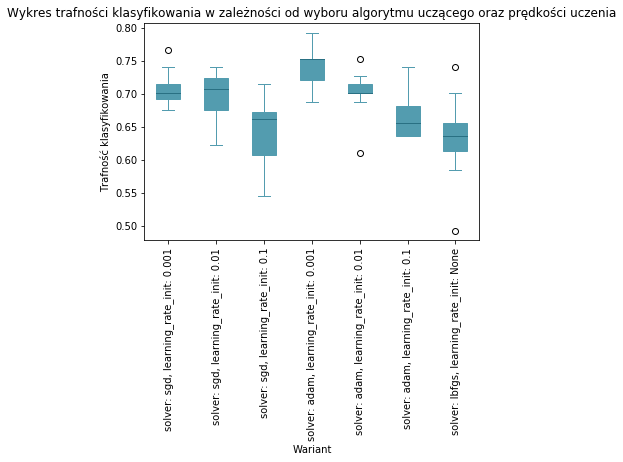

In [89]:
all_accs = np.array(all_accs)

boxplot(x_data = labels
        , y_data = np.array(all_accs)
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Wariant'
        , y_label = 'Trafność klasyfikowania'
        , title = 'Wykres trafności klasyfikowania w zależności od wyboru algorytmu uczącego oraz prędkości uczenia'
        #, filename = "Zad10_acc"
       )

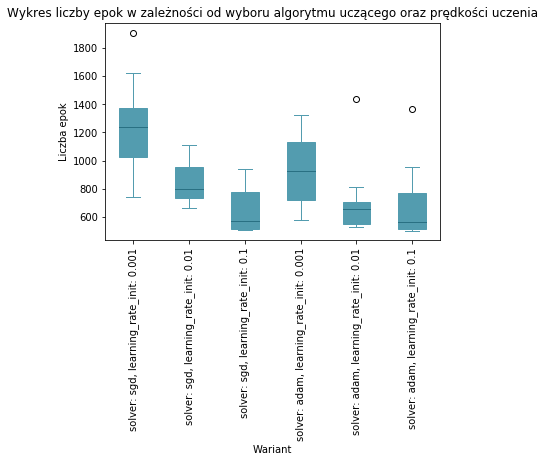

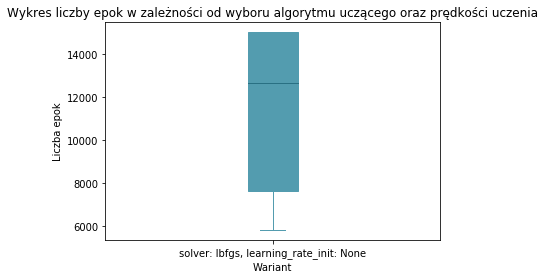

In [88]:
boxplot(x_data = labels[:-1]
        , y_data = np.array(all_n_iters).T[:-1].T
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Wariant'
        , y_label = 'Liczba epok'
        , title = 'Wykres liczby epok w zależności od wyboru algorytmu uczącego oraz prędkości uczenia'
        #, filename = "Zad10_iter"
       )
boxplot(x_data = labels[-1:]
        , y_data = np.array(all_n_iters).T[-1:].T
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Wariant'
        , y_label = 'Liczba epok'
        , title = 'Wykres liczby epok w zależności od wyboru algorytmu uczącego oraz prędkości uczenia'
        #, filename = "Zad10_iter_lbfgs"
        , horizontal=True)

# Zad 12

In [25]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test)  

In [26]:
num_iters = 7000
accs = []

for i in range(20):
    print(i + 1)
    classifier = MLPClassifier(hidden_layer_sizes=(8, 5, 4, 8), 
                               solver='adam', learning_rate_init=0.001,
                               activation='relu',
                               max_iter=num_iters,
                               # n_iter_no_change=num_iters,
                               alpha=1e-1
                               )

    classifier.fit(X_train_scaled, y_train)

    accs.append(classifier.score(X_test_scaled, y_test))

print(np.mean(accs))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
0.8324675324675326
